In [1]:
%matplotlib inline

In [2]:
import os
from pathlib import Path

import numpy as np
from matplotlib import pyplot as plt
from tqdm.notebook import tqdm
from skimage.io import imread
from skimage import img_as_float
from skimage.metrics import peak_signal_noise_ratio
from sklearn.cluster import KMeans

In [3]:
data_path = Path(os.getcwd()).parent/"data"

img = imread(data_path/'parrots.jpg')

In [4]:
def save_ans(*ans, delimiter=" "):
    with open(data_path.parent/"res.txt", "w") as f:
        f.write(delimiter.join(map(str, ans)))

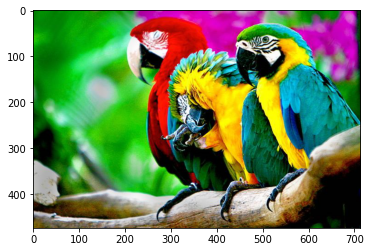

In [5]:
plt.imshow(img)

In [6]:
img = img_as_float(img)

In [7]:
X = np.array(img.reshape((img.shape[0] * img.shape[1], 3)))

In [8]:
X.shape

(337962, 3)

In [9]:
for n_cl in tqdm(range(2, 21)):
    km = KMeans(init="k-means++", random_state=241, n_clusters=n_cl)
    km.fit(X)
    y = km.labels_
    X_median = np.array(X)
    X_mean = np.array(X)
    for i in range(y.min(), y.max() + 1):
        X_median[y==i] = np.median(X_median[y==i], axis=0)
        X_mean[y==i] = np.mean(X_mean[y==i], axis=0)

    img_median = X_median.reshape(img.shape)
    img_mean = X_mean.reshape(img.shape)

    print(f"n_cl: {n_cl} "
          f"PSNR_median = {peak_signal_noise_ratio(img, img_median)} "
          f"PSNR_mean = {peak_signal_noise_ratio(img, img_mean)} ")

n_cl: 2 PSNR_median = 11.650216436393377 PSNR_mean = 12.080111207439757 
n_cl: 3 PSNR_median = 12.788196832555386 PSNR_mean = 13.15349264587281 
n_cl: 4 PSNR_median = 14.005760638202233 PSNR_mean = 14.36778449030687 
n_cl: 5 PSNR_median = 15.179272618915768 PSNR_mean = 15.527006063143322 
n_cl: 6 PSNR_median = 16.05391213731671 PSNR_mean = 16.54394847463964 
n_cl: 7 PSNR_median = 17.341044237540768 PSNR_mean = 17.640930795466097 
n_cl: 8 PSNR_median = 18.146655471791103 PSNR_mean = 18.436728778310275 
n_cl: 9 PSNR_median = 18.816039984444913 PSNR_mean = 19.112486441158325 
n_cl: 10 PSNR_median = 19.412342388847847 PSNR_mean = 19.639502132700603 
n_cl: 11 PSNR_median = 19.84625170662676 PSNR_mean = 20.127208603378875 
n_cl: 12 PSNR_median = 20.305935852415388 PSNR_mean = 20.592147111458793 
n_cl: 13 PSNR_median = 20.79114166539987 PSNR_mean = 21.020983269839174 
n_cl: 14 PSNR_median = 21.125303099076362 PSNR_mean = 21.3282769487692 
n_cl: 15 PSNR_median = 21.40327155457729 PSNR_mean = 2

In [10]:
save_ans(11)